<a href="https://colab.research.google.com/github/Kushal34563/Math-F242-project/blob/main/bankwaitFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i

In [ ]:
def F_R(path, noR):
    iC = 0
    with open(path,'r') as file:
        nRows = noR
        nColumns = 4
        dataset = np.zeros(shape=(nRows, nColumns))
        ATs = []
        for line in file:
            try:
                dInst = line.split(',')
                AT = dInst[1]
                AT = dt.datetime.strptime(AT, '%H:%M')
                aH = AT.hour
                aM = AT.minute
                wM = dInst[2]
                sM = dInst[3]

                ATs.append(AT)
                dataset[iC] = [aH, aM, wM, sM]
                iC = iC + 1
            except:
                pass
    return dataset, ATs


In [ ]:
rFilePath = '/BankDataCsv/'
fNa = 'Bank1Week1Day1'
fullPath = rFilePath + fNa + '.csv'
tf, tat = F_R(fullPath, 879)
print(tf)

[[ 8.  0. 11. 28.]
 [ 8.  0. 13. 25.]
 [ 8.  0. 14. 26.]
 ...
 [14. 59. 14. 27.]
 [14. 59. 13. 29.]
 [14. 59. 11. 28.]]


In [ ]:
fNas = []
rFilePath = '/BankDataCsv/'
fullDataset = pd.DataFrame()
for bC in range(2):
  for wC in range(4):
    for dC in range(5):
      fNa = 'Bank' + str(bC + 1) + 'Week' + str(wC + 1) + 'Day' + str(dC + 1)
      fullPath = rFilePath + fNa + '.csv'
      fNas.append(fullPath)

      noR = file_len(fullPath) - 1
      print ( fNa + '   '+ str(noR) + '   entries')
      tFrs, tempATs = F_R(rFilePath + fNa + '.csv',noR)
      #tFrs, tempATs = F_R(rFilePath + 'Bank1Week1Day1' + '.csv',noR)
      dftFrs = pd.DataFrame(np.array(tFrs), columns=['hour', 'minutes', 'waitingTime', 'serviceTime'])
      dfTempATs = pd.DataFrame(np.array(tempATs), columns=['AT'])
      #print(dftFrs)

      tLtQ = []
      for ATCounter in range(noR):
          tLtQ.append(dfTempATs.at[ATCounter, 'AT'] + pd.Timedelta(minutes = dftFrs.at[ATCounter, 'waitingTime']))
      dftLtQ = pd.DataFrame(np.array(tLtQ), columns=['tLtQ'])

      wPpl = np.zeros(noR)
      for i in range(noR):
        for j in range(i):
          if (dfTempATs.at[i, 'AT'] < dftLtQ.at[j, 'tLtQ']):
              wPpl[i] += 1
      DFwPpl = pd.DataFrame(np.array(wPpl), columns=['waitingPeople'])
      dayOfWeek = np.zeros(noR)
      for i in range(noR):
          dayOfWeek[i] = dC
      DFdoW = pd.DataFrame(np.array(dayOfWeek), columns=['dayOfWeek'])
      DFwPpl['waitingPeople'] = DFwPpl['waitingPeople'].astype(int)
      dftFrs['hour'] = dftFrs['hour'].astype(int)
      dftFrs['minutes'] = dftFrs['minutes'].astype(int)
      DFdoW['dayOfWeek'] = DFdoW['dayOfWeek'].astype(int)

      tempDataset = pd.concat([dftFrs, DFwPpl, DFdoW], axis=1)

      fullDataset = pd.concat([fullDataset, tempDataset], axis=0)

fullDataset = fullDataset.reset_index(drop = True)
print(fullDataset.shape[0])

Bank1Week1Day1   879   entries
Bank1Week1Day2   719   entries
Bank1Week1Day3   1019   entries
Bank1Week1Day4   801   entries
Bank1Week1Day5   521   entries
Bank1Week2Day1   988   entries
Bank1Week2Day2   683   entries
Bank1Week2Day3   547   entries
Bank1Week2Day4   1020   entries
Bank1Week2Day5   788   entries
Bank1Week3Day1   998   entries
Bank1Week3Day2   989   entries
Bank1Week3Day3   1000   entries
Bank1Week3Day4   1050   entries
Bank1Week3Day5   981   entries
Bank1Week4Day1   856   entries
Bank1Week4Day2   980   entries
Bank1Week4Day3   1056   entries
Bank1Week4Day4   898   entries
Bank1Week4Day5   995   entries
Bank2Week1Day1   1033   entries
Bank2Week1Day2   788   entries
Bank2Week1Day3   1001   entries
Bank2Week1Day4   909   entries
Bank2Week1Day5   930   entries
Bank2Week2Day1   747   entries
Bank2Week2Day2   923   entries
Bank2Week2Day3   871   entries
Bank2Week2Day4   763   entries
Bank2Week2Day5   889   entries
Bank2Week3Day1   970   entries
Bank2Week3Day2   684   entries
B

In [ ]:
print(f'The dataset has {fullDataset.shape[0]} rows and {fullDataset.shape[1]} columns.')

The dataset has 35236 rows and 6 columns.


In [ ]:
fullDataset.head()

,hour,minutes,waitingTime,serviceTime,waitingPeople,dayOfWeek
0,8,0,11.0,28.0,0,0
1,8,0,13.0,25.0,1,0
2,8,0,14.0,26.0,2,0
3,8,0,9.0,26.0,3,0
4,8,0,14.0,23.0,4,0


In [ ]:
fullDataset.describe()

,hour,minutes,waitingTime,serviceTime,waitingPeople,dayOfWeek
count,35236.000000,35236.000000,35236.000000,35236.000000,35236.000000,35236.000000
mean,10.662533,28.066835,13.814366,14.727949,30.858327,1.963901
std,2.118393,17.350813,6.554962,6.357082,18.955454,1.413191
min,8.000000,0.000000,3.000000,4.000000,0.000000,0.000000
25%,9.000000,13.000000,9.000000,9.000000,18.000000,1.000000
50%,10.000000,27.000000,12.000000,14.000000,26.000000,2.000000
75%,13.000000,43.000000,18.000000,18.000000,39.000000,3.000000
max,14.000000,59.000000,35.000000,36.000000,163.000000,4.000000


In [ ]:
print(f'There are {fullDataset.isnull().any().sum()} columns in the dataset with missing values.')

There are 0 columns in the dataset with missing values.


Text(0, 0.5, 'Probability density')

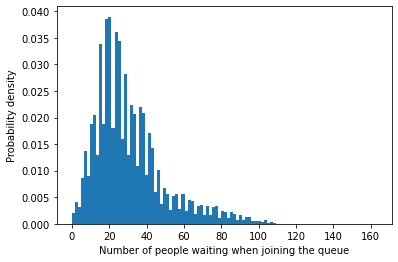

In [ ]:
x = fullDataset["waitingPeople"]
num_bins = 100
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=1)

ax.set_xlabel('Number of people waiting when joining the queue')
ax.set_ylabel('Probability density')

Text(0, 0.5, 'Probability density')

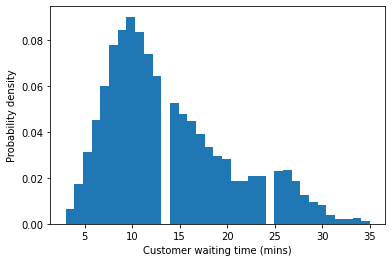

In [ ]:
x = fullDataset["waitingTime"]
num_bins = 35
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=1)

ax.set_xlabel('Customer waiting time (mins)')
ax.set_ylabel('Probability density')

In [ ]:
workingCopyDataset = fullDataset
workingCopyDataset.drop(['serviceTime'], axis=1);

In [ ]:
# mean encoding for regression output
def mean_encoder_regression(input_vector, output_vector):
    assert len(input_vector) == len(output_vector)
    noR = len(input_vector)

    temp = pd.concat([input_vector, output_vector], axis=1)
    # Compute target mean
    averages = temp.groupby(by=input_vector.name)[output_vector.name].agg(["mean", "count"])

    print(averages)
    return_vector = pd.DataFrame(0, index=np.arange(noR), columns={'feature'})

    for i in range(noR):
        return_vector.iloc[i] = averages['mean'][input_vector.iloc[i]]

    return return_vector

In [ ]:
encoded_input_vector_hour = mean_encoder_regression(workingCopyDataset['hour'], workingCopyDataset['waitingTime'])
encoded_input_vector_hour.columns = ['hour']
encoded_input_vector_minutes = mean_encoder_regression(workingCopyDataset['minutes'], workingCopyDataset['waitingTime'])
encoded_input_vector_minutes.columns = ['minutes']
encoded_input_vector_dayOfWeek = mean_encoder_regression(workingCopyDataset['dayOfWeek'], workingCopyDataset['waitingTime'])
encoded_input_vector_dayOfWeek.columns = ['dayOfWeek']

           mean  count
hour                  
8     13.810723   7703
9     13.894415   5891
10    13.264297   4249
11    13.734425   4093
12    13.378100   4274
13    13.372167   4103
14    15.012797   4923
              mean  count
minutes                  
0        13.789203    778
1        14.139024    820
2        13.684298    605
3        13.886364    660
4        14.478849    591
5        13.578249    754
6        13.307531    478
7        13.934911    676
8        13.471429    560
9        13.813620    558
10       13.681818    594
11       14.077682    811
12       14.056530    513
13       13.726027    584
14       14.089580    547
15       14.185087    751
16       14.457195    549
17       14.587776    769
18       13.609403    553
19       14.176887    848
20       13.879941    683
21       14.383929    560
22       15.090508    453
23       13.731572    719
24       14.157692    520
25       13.654305    755
26       14.104811    582
27       14.219672    610
28       14.3

In [ ]:
X = pd.concat([encoded_input_vector_hour['hour'], encoded_input_vector_minutes['minutes'], pd.DataFrame(workingCopyDataset['waitingPeople']), encoded_input_vector_dayOfWeek['dayOfWeek']], axis=1)
y = workingCopyDataset['waitingTime']

In [ ]:
X.describe()

,hour,minutes,waitingPeople,dayOfWeek
count,35236.000000,35236.000000,35236.000000,35236.000000
mean,13.814366,13.814366,30.858327,13.814366
std,0.533695,0.453116,18.955454,0.751573
min,13.264297,13.003745,0.000000,12.896959
25%,13.378100,13.451311,18.000000,13.053426
50%,13.810723,13.770383,26.000000,13.886309
75%,13.894415,14.139024,39.000000,14.445975
max,15.012797,15.090508,163.000000,14.809780


In [ ]:
display(X)

,hour,minutes,waitingPeople,dayOfWeek
0,13.810723,13.789203,0,13.053426
1,13.810723,13.789203,1,13.053426
2,13.810723,13.789203,2,13.053426
3,13.810723,13.789203,3,13.053426
4,13.810723,13.789203,4,13.053426
...,...,...,...,...
35231,15.012797,14.106776,20,14.445975
35232,15.012797,14.106776,21,14.445975
35233,15.012797,14.106776,22,14.445975
35234,15.012797,13.161597,21,14.445975


In [ ]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.15, random_state=42)
print(trainX.shape, trainy.shape)
print(testX.shape, testy.shape)

(29950, 4) (29950,)
(5286, 4) (5286,)


In [ ]:
def scale_input(X, means, stds):
    return (X - means) / stds

def descale_input(X, means, stds):
    return (X * stds) + means

In [ ]:
meansX = trainX.mean(axis=0)
stdsX = trainX.std(axis=0) + 1e-10

In [ ]:
trainX_scaled = scale_input(trainX, meansX, stdsX)
testX_scaled = scale_input(testX, meansX, stdsX)

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [ ]:
NN = MLPRegressor(max_iter=500, activation = "relu", hidden_layer_sizes=(100,100))

In [ ]:
NN.fit(trainX,trainy)

NN_pred = NN.predict(testX)

print("MAE    ", mean_absolute_error(testy,NN_pred))

MAE     3.7228708592472035


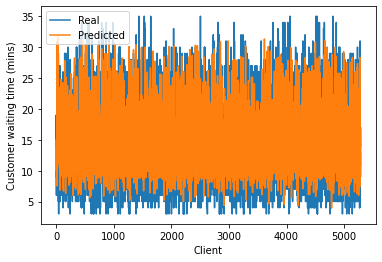

In [ ]:
testy_pred = NN.predict(testX)
myLength = len(testy_pred)
plt.plot(range(myLength), testy)
plt.plot(range(myLength), testy_pred)
plt.ylabel('Customer waiting time (mins)')
plt.xlabel('Client')
plt.legend(['Real', 'Predicted'], loc='upper left')

In [ ]:
myMae = mean_absolute_error(testy, testy_pred)
print(f'The mean absolute error I get with the neural network is {myMae} minutes.')

The mean absolute error I get with the neural network is 3.7228708592472035 minutes.
